# Regresi√≥n Lineal Multivariable

La regresi√≥n lineal m√∫ltiple es un m√©todo estad√≠stico utilizado para predecir el resultado de una variable de respuesta mediante la combinaci√≥n de numerosas variables explicativas o caracter√≠sticas. Es una variante de la regresi√≥n lineal (m√≠nimos cuadrados ordinarios) en la que se utiliza una sola variable explicativa. \geeks

La siguiente es la relaci√≥n lineal entre las variables dependientes e independientes:

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \ldots$

Donde 
* $y$ = variable dependiente u objetivo
* $\beta_0$ = Intercepto de la regresi√≥n lineal
* $\beta_1, \beta_2, \beta_3, \dots, \beta_n$ = Pendiente de la l√≠nea de regresi√≥n que indica si la l√≠nea es creciente o decreciente.
* $X_1, X_2, X_3, \dots, X_n$ = Variable independiente, predictora
* $e$ = Error

## Aplicaci√≥n del M√©todo de Regresi√≥n Lineal

Este m√©todo ser√° utilizado para predecir el precio de laptops en funci√≥n de sus especificaciones. Los datos provienen del siguiente conjunto de datos, el cual servir√° como base para entrenar el modelo y evaluar su precisi√≥n en la estimaci√≥n de precios.

> **Fuente de los datos:**  
> üìä [Dataset de precios de laptops](https://ejemplo.com/dataset)  
> Incluye 11 especificaciones: Compa√±√≠a, producto (marca y modelo), tipo, tama√±o de pantalla procesador, resoluci√≥n de pantalla, CPU, RAM, memoria, GPU, sistema operativo y peso. 

### Preprocesamiento de datos para: "Laptop Price"

In [ ]:
#Importando librer√≠as, numpy para c√°lculos matem√°ticos, matplotlib.pyplot para gr√°ficas, pandas para poder leer y manipular el archivo con los datos y sklearn para poder hacer el Label Encoding.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
pd.options.mode.chained_assignment = None

#Leyendo los datos
df = pd.read_csv('./datasources/laptops/laptop_price.csv', encoding='latin-1')
df

laptop_ID Company                              Product  \
0             1   Apple                          MacBook Pro   
1             2   Apple                          Macbook Air   
2             3      HP                               250 G6   
3             4   Apple                          MacBook Pro   
4             5   Apple                          MacBook Pro   
...         ...     ...                                  ...   
1298       1316  Lenovo                       Yoga 500-14ISK   
1299       1317  Lenovo                       Yoga 900-13ISK   
1300       1318  Lenovo                   IdeaPad 100S-14IBR   
1301       1319      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon   
1302       1320    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)   

                TypeName  Inches                            ScreenResolution  \
0              Ultrabook    13.3          IPS Panel Retina Display 2560x1600   
1              Ultrabook    13.3                                    1440x900   
2               Notebook    15.6                           Full HD 1920x1080   
3              Ultrabook    15.4          IPS Panel Retina Display 2880x1800   
4              Ultrabook    13.3          IPS Panel Retina Display 2560x1600   
...                  ...     ...                                         ...   
1298  2 in 1 Convertible    14.0   IPS Panel Full HD / Touchscreen 1920x1080   
1299  2 in 1 Convertible    13.3  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300            Notebook    14.0                                    1366x768   
1301            Notebook    15.6                                    1366x768   
1302            Notebook    15.6                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1298            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB            500GB HDD   

                               Gpu       OpSys  Weight  Price_euros  
0     Intel Iris Plus Graphics 640       macOS  1.37kg      1339.69  
1           Intel HD Graphics 6000       macOS  1.34kg       898.94  
2            Intel HD Graphics 620       No OS  1.86kg       575.00  
3               AMD Radeon Pro 455       macOS  1.83kg      2537.45  
4     Intel Iris Plus Graphics 650       macOS  1.37kg      1803.60  
...                            ...         ...     ...          ...  
1298         Intel HD Graphics 520  Windows 10   1.8kg       638.00  
1299         Intel HD Graphics 520  Windows 10   1.3kg      1499.00  
1300             Intel HD Graphics  Windows 10   1.5kg       229.00  
1301            AMD Radeon R5 M330  Windows 10  2.19kg       764.00  
1302             Intel HD Graphics  Windows 10   2.2kg       369.00  

[1303 rows x 13 columns]

In [2]:
#Cantidad de filas y columnas en total
df.shape

(1303, 13)

In [3]:
df.duplicated().sum()

np.int64(0)

Por el momento, el archivo no tiene filas duplicadas.

$ \large \textbf{Exploraci√≥n y limpieza inicial}$ 

* $\text{Analizando y convirtiendo datos:}$

Verificando que no falten datos:

In [4]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

En ninguna de las columnas hacen falta datos, por lo que no es necesario tomar otra acci√≥n.

Identificando los tipos de datos encontrados en el archivo:

In [5]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

Se eliminar√° la columna de "laptop_ID", ya que no nos aporta datos importantes para el entrenamiento del modelo.

In [6]:
df.drop('laptop_ID', axis=1, inplace=True)

Ahora se extraeran los datos encontrados en cada una de las columnas para poder ocuparlas c√≥mo valores num√©ricos, las variables completamente nominales ser√°n tratadas m√°s adelante.

Para el peso se eliminar√° la parte de "kg", ya que se todos los pesos est√°n expresados con las mismas unidades en toda la tabla, as√≠ se podr√° trabajar con una variable de tipo float.

In [7]:
df['Weight']=df['Weight'].str.replace('kg','')
df['Weight']=df['Weight'].astype('float64')

Para la RAM, se eliminar√° "GB" de la misma forma.

In [8]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Ram']=df['Ram'].astype('int64')

Luego se convertir√° el precio de euros a d√≥lares, para poder apreciar de mejor manera los resultados:

In [9]:
df.rename(columns={'Price_euros':'Price'}, inplace=True)
df.loc[:, 'Price'] *=1.13

* $\textbf{Valores extremos o Outliers}$\
Usando los diagramas de caja:

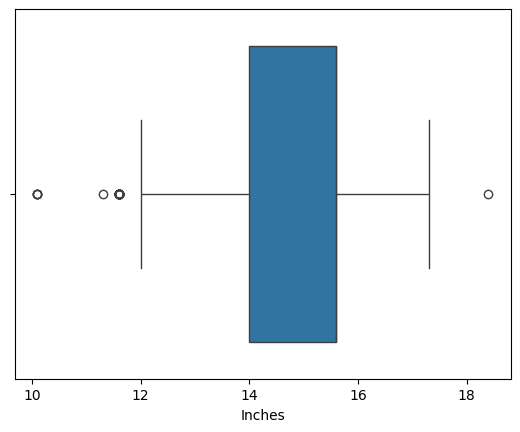

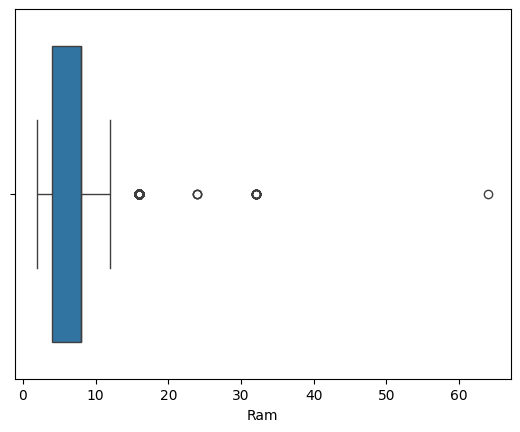

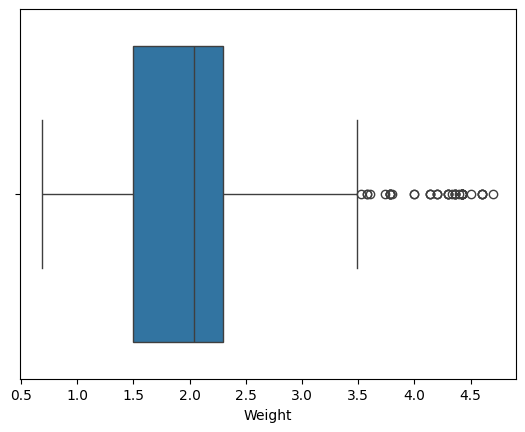

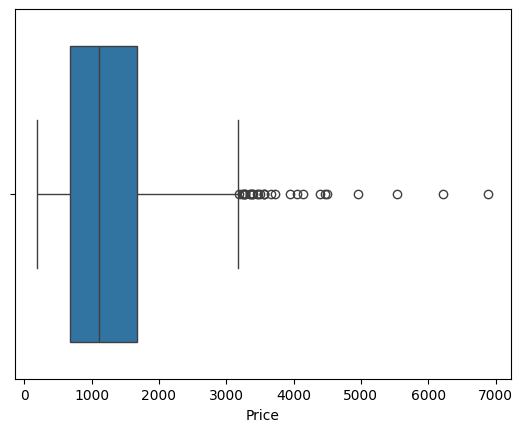

In [10]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

No se graficar√°n las dem√°s variables en este momento debido a que son nominales y ser√°n tratadas luego.

* $\textbf{Duplicados:}$\
Identificando valores duplicados:

In [11]:
df.duplicated().sum()

np.int64(28)

Originalmente, como contabamos con la columna de "laptop_ID", no se marcaba ning√∫n duplicado, pero al quitar esta salen 28 filas duplicadas, lo cual significa que si hab√≠an valores duplicados, los cuales solo ten√≠an de diferencia la ID asignada, debido a esto es necesario ocupar la funci√≥n drop_duplicates() de la librer√≠a Pandas.

In [12]:
df=df.drop_duplicates()

Comprobando que no queden duplicados:

In [13]:
df.duplicated().sum()

np.int64(0)

* $\textbf{Visualizaci√≥n:}$\
Hasta el momento solo se han obtenido 4 variables num√©ricas, por lo que si se utiliza una matriz de correlaci√≥n se obtiene el siguiente resultado:

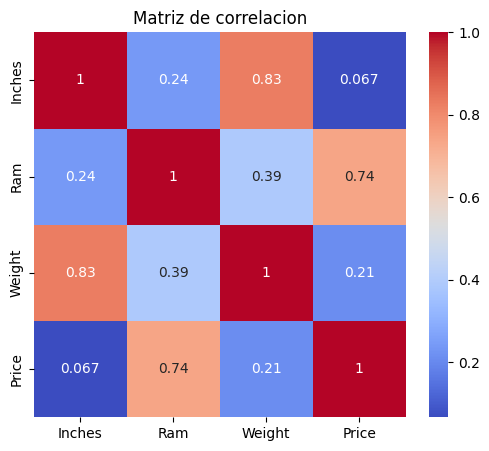

In [14]:
plt.figure(figsize=(6,5))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap='coolwarm', annot=True)
plt.title('Matriz de correlacion')
plt.show()

Luego se observar√° esta matriz con los datos faltantes.

$ \large \textbf{Manejo de variables categ√≥ricas (Encoding)}$ 

* $\textbf{One-Hot Encoding:}$\
Primero se intentar√° ocupar la funci√≥n pandas.get_dummies() para poder clasificar variables nominales usando el One-Hot Encoding, siendo estas: "Company", "Product", "TypeName", "ScreenResolution", "Cpu", "Memory", "Gpu" y "OpSys".

In [15]:
pd.get_dummies(df)

Inches  Ram  Weight      Price  Company_Acer  Company_Apple  \
0       13.3    8    1.37  1513.8497         False           True   
1       13.3    8    1.34  1015.8022         False           True   
2       15.6    8    1.86   649.7500         False          False   
3       15.4   16    1.83  2867.3185         False           True   
4       13.3    8    1.37  2038.0680         False           True   
...      ...  ...     ...        ...           ...            ...   
1270    14.0    4    1.80   720.9400         False          False   
1271    13.3   16    1.30  1693.8700         False          False   
1272    14.0    2    1.50   258.7700         False          False   
1273    15.6    6    2.19   863.3200         False          False   
1274    15.6    4    2.20   416.9700         False          False   

      Company_Asus  Company_Chuwi  Company_Dell  Company_Fujitsu  ...  \
0            False          False         False            False  ...   
1            False          False         False            False  ...   
2            False          False         False            False  ...   
3            False          False         False            False  ...   
4            False          False         False            False  ...   
...            ...            ...           ...              ...  ...   
1270         False          False         False            False  ...   
1271         False          False         False            False  ...   
1272         False          False         False            False  ...   
1273         False          False         False            False  ...   
1274          True          False         False            False  ...   

      Gpu_Nvidia Quadro M620M  OpSys_Android  OpSys_Chrome OS  OpSys_Linux  \
0                       False          False            False        False   
1                       False          False            False        False   
2                       False          False            False        False   
3                       False          False            False        False   
4                       False          False            False        False   
...                       ...            ...              ...          ...   
1270                    False          False            False        False   
1271                    False          False            False        False   
1272                    False          False            False        False   
1273                    False          False            False        False   
1274                    False          False            False        False   

      OpSys_Mac OS X  OpSys_No OS  OpSys_Windows 10  OpSys_Windows 10 S  \
0              False        False             False               False   
1              False        False             False               False   
2              False         True             False               False   
3              False        False             False               False   
4              False        False             False               False   
...              ...          ...               ...                 ...   
1270           False        False              True               False   
1271           False        False              True               False   
1272           False        False              True               False   
1273           False        False              True               False   
1274           False        False              True               False   

      OpSys_Windows 7  OpSys_macOS  
0               False         True  
1               False         True  
2               False        False  
3               False         True  
4               False         True  
...               ...          ...  
1270            False        False  
1271            False        False  
1272            False        False  
1273            False        False  
1274            False        False  

[1275 rows x 963 

Como se puede observar, esta funci√≥n crea demasiadas columnas, por lo que se trabajar√° con otro m√©todo m√°s compacto.

* $\textbf{Label/Ordinal Encoding:}$\
Se ocupar√° este tipo de Encoding debido a que le asigna un valor a cada categor√≠a de una columna, obteniendo as√≠ valores num√©ricos que podr√°n ser ocupados luego.

Aunque, antes de realizar este proceso se van a separar los campos de ciertas variables, empezando por la CPU, para as√≠ poder tener una variable correspondiente a la compa√±ia junto al modelo de la "Cpu" y otra para la rapidez de esta, es decir los GHz.

In [16]:
#Para la frecuencia
def split_str(x):
    x = x.split(' ')
    return x[-1] 

df.loc[:,'CpuFrequency'] = df['Cpu'].apply(split_str)
df['CpuFrequency'] = df['CpuFrequency'].str.replace('GHz', '')
df['CpuFrequency'] = df['CpuFrequency'].astype('float64')

#Quitando la frecuencia para el modelo de la CPU
df['Cpu']= df['Cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex=True)
df.loc[:,'CpuModel']= df['Cpu']

#Eliminando la columna original
df.drop('Cpu', axis=1, inplace=True)

Ahora para la GPU:

In [17]:
#Para conseguir la marca
def split_str(x):
    x = x.split(' ')
    return x[0]

df.loc[:,'GpuBrand'] = df['Gpu'].apply(lambda x : split_str(x))

#Para conseguir el modelo
def split_model(x):
    x = x.split(' ')
    if len(x)==2:
        model = x[-1]
    elif len(x) == 3:
        model = x[-2:]  
    elif len(x) == 4:
        model = x[-3:]  
    elif len(x) == 5:
        model = x[-3:]  
    return ' '.join(model)

df.loc[:,'GpuModel'] = df['Gpu'].apply(split_model)

#Eliminando la columna original
df.drop('Gpu', axis=1, inplace=True)

Luego para la columna "Memory":

In [18]:
df.Memory.value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        124
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
1.0TB Hybrid                       7
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

Como se puede observar, hay cuatro tipos de almacenamiento, SSD, HDD, Flash Storage y Hybrid, por lo que se separar√°n en columnas distintas:

In [19]:
df_clean = df.copy()

# Inicializar columnas
df_clean['Storage'] = 0
df_clean['SSD'] = 0
df_clean['HDD'] = 0
df_clean['Flash Storage'] = 0
df_clean['Hybrid'] = 0

# Funci√≥n para convertir a GB en caso de tener TB
def parse_size(size_text):
    size_text = size_text.replace(" ", "")
    if "TB" in size_text:
        return int(float(size_text.replace("TB", "").replace("GB", "")) * 1000)
    elif "GB" in size_text:
        return int(float(size_text.replace("GB", "")))
    return 0

# Procesando filas
for i, row in df_clean.iterrows():
    memory = row['Memory']
    devices = memory.split('+')
    total = ssd = hdd = flash = hybrid = 0

    for device in devices:
        device = device.strip()
        parts = device.split()
        if len(parts) >= 2:
            size_text = parts[0]
            dtype = " ".join(parts[1:])
            size = parse_size(size_text)
            total += size
            if 'SSD' in dtype:
                ssd += size
            elif 'HDD' in dtype:
                hdd += size
            elif 'Flash Storage' in dtype:
                flash += size
            elif 'Hybrid' in dtype:
                hybrid += size

    df_clean.at[i, 'Storage'] = total
    df_clean.at[i, 'SSD'] = ssd
    df_clean.at[i, 'HDD'] = hdd
    df_clean.at[i, 'Flash Storage'] = flash
    df_clean.at[i, 'Hybrid'] = hybrid

#Borrando la columna original
df_clean.drop('Memory', axis=1, inplace=True)

#Aplicando los cambios a los datos originales
df=df_clean

Tambi√©n se realizar√° este proceso para la variable "ScreenResolution", consiguiendo as√≠ al tipo de pantalla como la variable "Screen" y la propia resoluci√≥n como la variable "Resolution".

Finalmente, se usar√° el "Label Encoding" para todas las variables nominales:

In [20]:
#Extrayendo los valores de resoluci√≥n
df.loc[:, 'Resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')

#Creando columnas para el ancho y la altura de la resoluci√≥n
df[['Width', 'Height']] = df['Resolution'].str.split('x', expand=True)
df['Width']=df['Width'].astype('int64')
df['Height']=df['Height'].astype('int64')

#Eliminando la columna original de la resoluci√≥n
df.drop('Resolution', axis=1, inplace=True)

#Extrayendo el tipo de pantalla
df.loc[:, 'Screen'] = df['ScreenResolution'].str.replace(r'(\d+x\d+)','',regex=True)

#Eliminando las plecas en los strings de "Screen" para solo tener el propio tipo de pantalla
df['Screen'] = df['Screen'].replace(r'(/)','',regex=True)

#Separando entre el propio tipo de pantalla y si esta es t√°ctil
df.loc[:, 'Touchscreen'] = df['Screen'].str.extract(r'(Touchscreen)')

#Y eliminando el string de "Touchscreen" para que solo quede el propio tipo de pantalla
df.loc[:,'Screen'] = df['Screen'].str.replace(r'(Touchscreen)','',regex=True)

#Reemplazando el texto de "Touchscreen" con valores binarios, debido a que las √∫nicas opciones son que la pantalla sea o no sea t√°ctil
with pd.option_context("future.no_silent_downcasting", True):
    df['Touchscreen'] = df['Touchscreen'].replace('Touchscreen',1).infer_objects(copy=False)
df['Touchscreen'] = df['Touchscreen'].replace(np.nan,0)
df['Touchscreen']=df['Touchscreen'].astype('int64')

#Se elimina la columna original, ya que ahora no es necesaria
df.drop('ScreenResolution', axis=1, inplace=True)

Realizando el propio Encoding:

In [21]:
df['Company']=preprocessing.LabelEncoder().fit_transform(df['Company'])
df['Product']=preprocessing.LabelEncoder().fit_transform(df['Product'])
df['TypeName']=preprocessing.LabelEncoder().fit_transform(df['TypeName'])
df['Screen']=preprocessing.LabelEncoder().fit_transform(df['Screen'])
df['CpuModel']=preprocessing.LabelEncoder().fit_transform(df['CpuModel'])
df['GpuBrand']=preprocessing.LabelEncoder().fit_transform(df['GpuBrand'])
df['GpuModel']=preprocessing.LabelEncoder().fit_transform(df['GpuModel'])
df['OpSys']=preprocessing.LabelEncoder().fit_transform(df['OpSys'])

In [22]:
#* $\textbf{Target Encoding:}$\
#Como este m√©todo se basa en la media de la variable de predicci√≥n, en este caso "Price", se obtendr√°n mejores resultados que con el One-Hot Encoding, ya que producir√° resultados num√©ricos que se podr√°n utilizar inmediatamente.

Ahora nos hemos quedado con las siguientes columnas:

In [23]:
df.dtypes

Company            int64
Product            int64
TypeName           int64
Inches           float64
Ram                int64
OpSys              int64
Weight           float64
Price            float64
CpuFrequency     float64
CpuModel           int64
GpuBrand           int64
GpuModel           int64
Storage            int64
SSD                int64
HDD                int64
Flash Storage      int64
Hybrid             int64
Width              int64
Height             int64
Screen             int64
Touchscreen        int64
dtype: object

Todas son n√∫mericas por lo que podemos observar nuevamente los diagramas de caja, pero ahora con todas las variables.

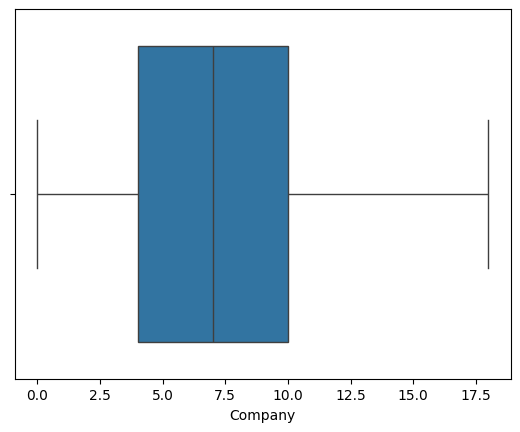

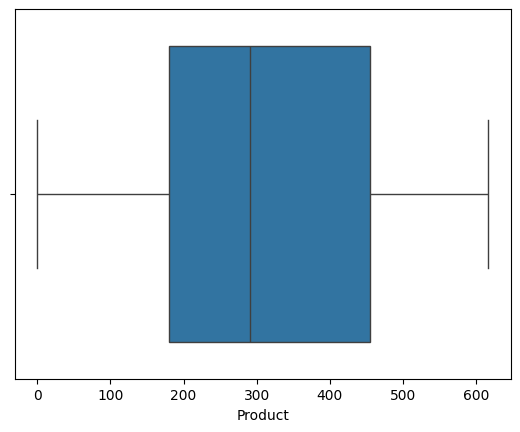

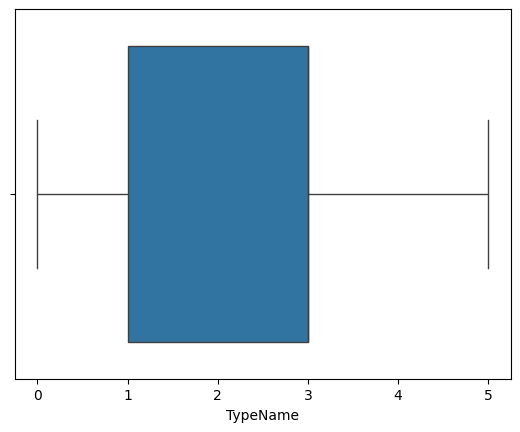

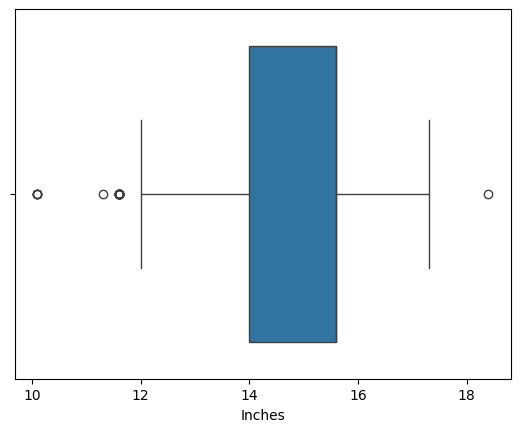

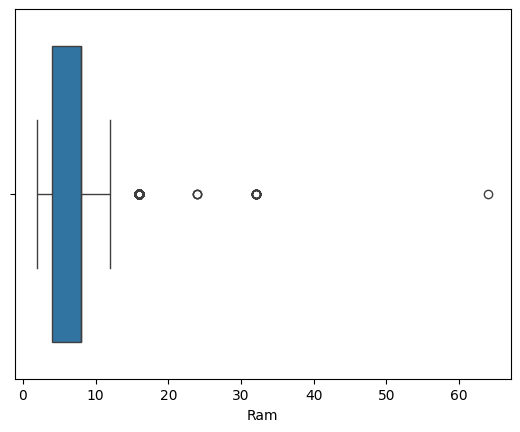

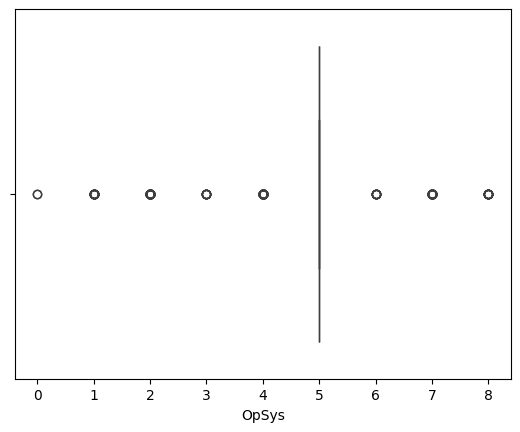

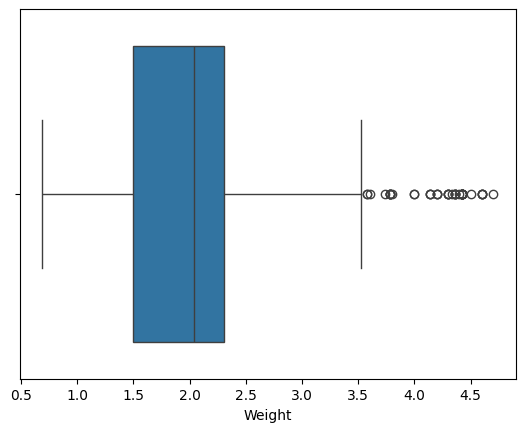

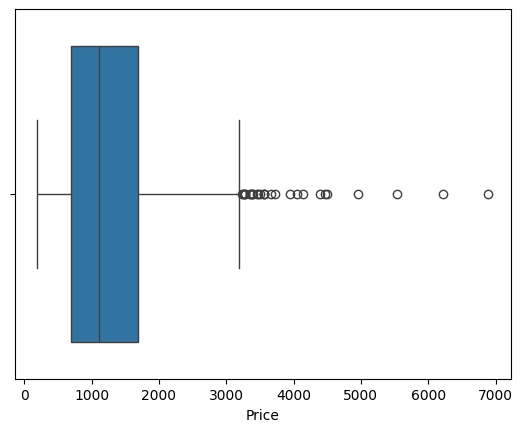

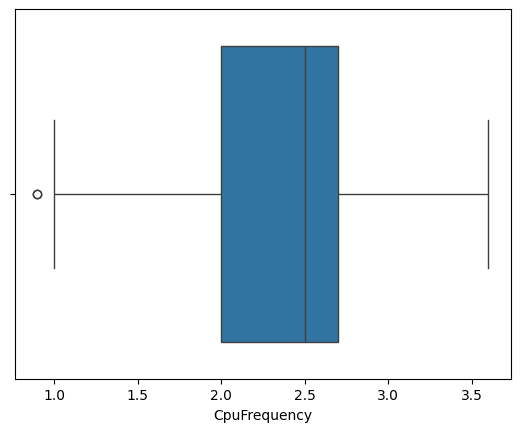

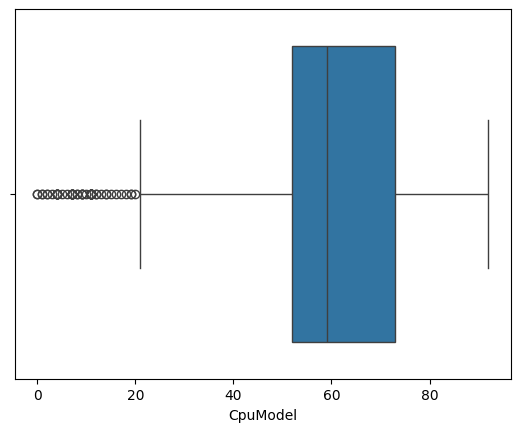

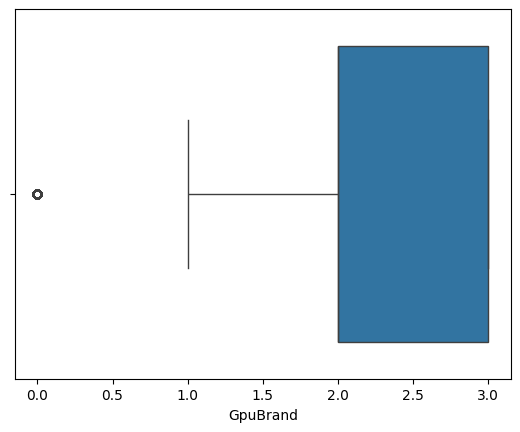

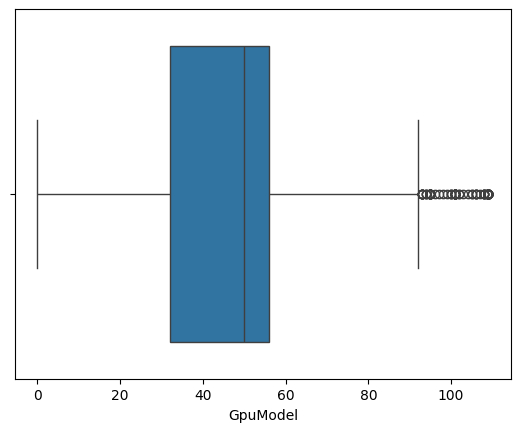

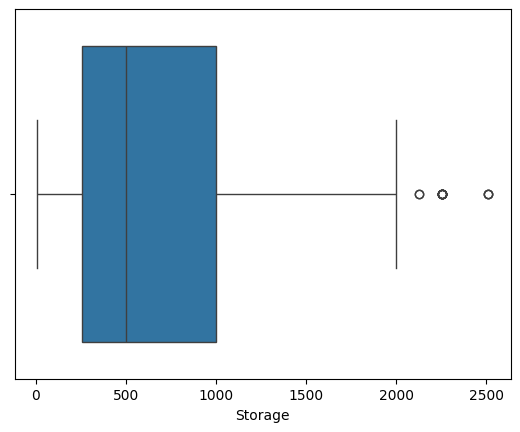

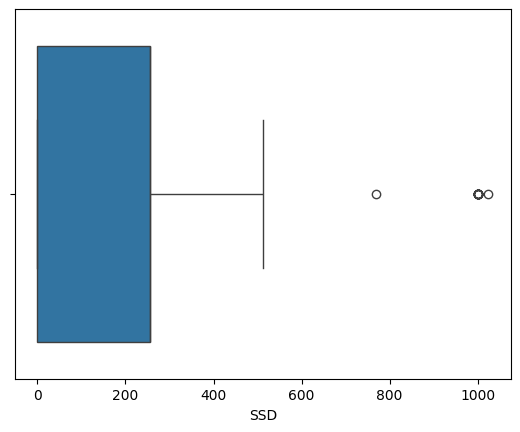

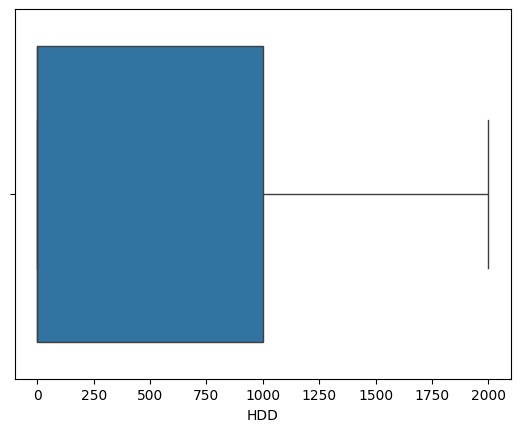

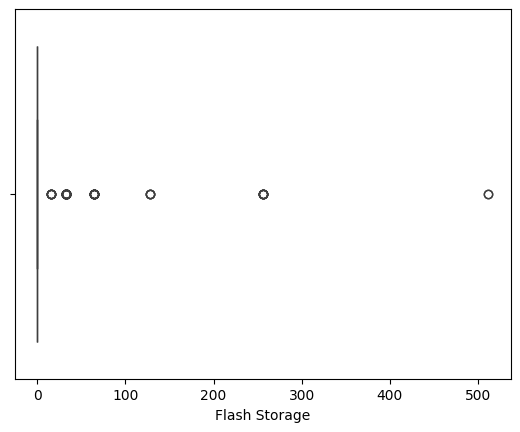

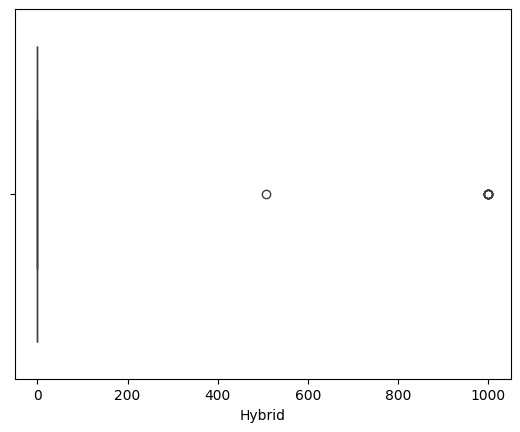

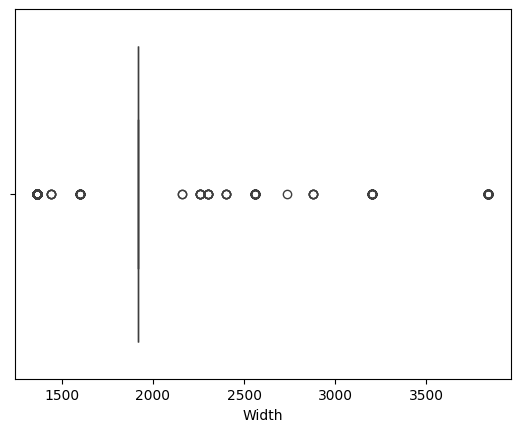

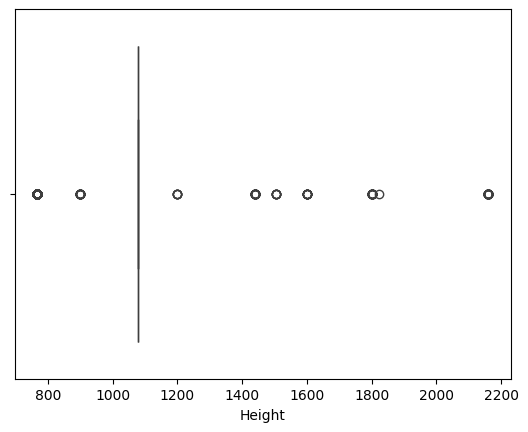

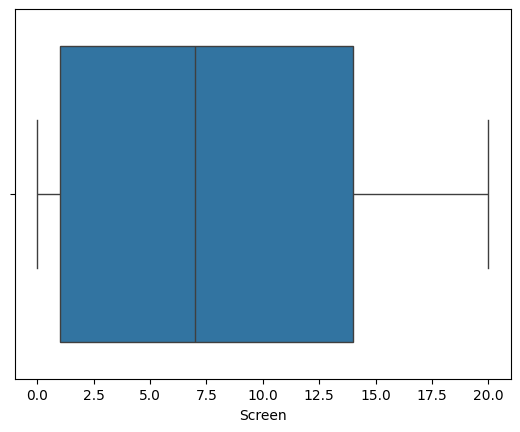

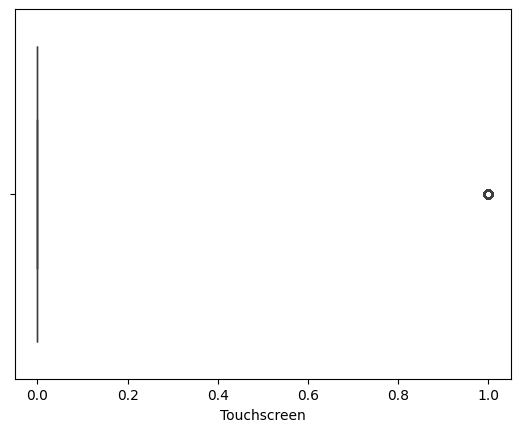

In [24]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

* $\textbf{Normalizaci√≥n:}$\
Para poder ocupar el m√©todo del gradiente descendiente, es necesario tener variables normalizadas, se ocupar√° el m√©todo de "M√≠n. M√°x." debido a que hay variables con distintas escalas dentro de los datos, por ejemplo, entre el peso y la RAM, ya que el peso se encuentra entre 0.6 y 5, mientras que la RAM se encuentra entre 2 y 64, comprobando esto:

In [25]:
df['Weight'].min()

np.float64(0.69)

In [26]:
df['Weight'].max()

np.float64(4.7)

In [27]:
df['Ram'].min()

np.int64(2)

In [28]:
df['Ram'].max()

np.int64(64)

Aplicando el m√©todo:

In [29]:
df_n=(df-df.min())/(df.max()-df.min())

#Observando como han quedado los cambios
df_n

Company   Product  TypeName    Inches       Ram  OpSys    Weight  \
0     0.055556  0.486224       0.8  0.385542  0.096774  1.000  0.169576   
1     0.055556  0.487844       0.8  0.385542  0.096774  1.000  0.162095   
2     0.388889  0.081037       0.6  0.662651  0.096774  0.500  0.291771   
3     0.055556  0.486224       0.8  0.638554  0.225806  1.000  0.284289   
4     0.055556  0.486224       0.8  0.385542  0.096774  1.000  0.169576   
...        ...       ...       ...       ...       ...    ...       ...   
1270  0.555556  0.940032       0.0  0.469880  0.032258  0.625  0.276808   
1271  0.555556  0.952998       0.0  0.385542  0.225806  0.625  0.152120   
1272  0.555556  0.317666       0.6  0.469880  0.000000  0.625  0.201995   
1273  0.388889  0.003241       0.6  0.662651  0.064516  0.625  0.374065   
1274  0.111111  0.920583       0.6  0.662651  0.032258  0.625  0.376559   

         Price  CpuFrequency  CpuModel  ...  GpuModel   Storage    SSD   HDD  \
0     0.196741      0.518519  0.554348  ...  0.568807  0.047923  0.125  0.00   
1     0.122353      0.333333  0.554348  ...  0.495413  0.047923  0.000  0.00   
2     0.067679      0.592593  0.619565  ...  0.513761  0.099042  0.250  0.00   
3     0.398895      0.666667  0.706522  ...  0.733945  0.201278  0.500  0.00   
4     0.275038      0.814815  0.554348  ...  0.577982  0.099042  0.250  0.00   
...        ...           ...       ...  ...       ...       ...    ...   ...   
1270  0.078312      0.592593  0.717391  ...  0.458716  0.047923  0.125  0.00   
1271  0.223629      0.592593  0.717391  ...  0.458716  0.201278  0.500  0.00   
1272  0.009283      0.259259  0.336957  ...  0.394495  0.022364  0.000  0.00   
1273  0.099578      0.592593  0.717391  ...  0.844037  0.396166  0.000  0.50   
1274  0.032911      0.259259  0.336957  ...  0.394495  0.196486  0.000  0.25   

      Flash Storage  Hybrid     Width    Height  Screen  Touchscreen  
0             0.000     0.0  0.482619  0.597701    0.90          0.0  
1             0.250     0.0  0.029911  0.094828    0.00          0.0  
2             0.000     0.0  0.223929  0.224138    0.35          0.0  
3             0.000     0.0  0.611964  0.741379    0.90          0.0  
4             0.000     0.0  0.482619  0.597701    0.90          0.0  
...             ...     ...       ...       ...     ...          ...  
1270          0.000     0.0  0.223929  0.224138    0.75          1.0  
1271          0.000     0.0  0.741310  0.741379    0.85          1.0  
1272          0.125     0.0  0.000000  0.000000    0.00          0.0  
1273          0.000     0.0  0.000000  0.000000    0.00          0.0  
1274          0.000     0.0  0.000000  0.000000    0.00          0.0  

[1275 rows x 21 columns]

* $\textbf{Visualizaci√≥n:}$\
Ahora que todas las variables han sido normalizadas, ya se puede observar su relaci√≥n por medio de una matriz de correlaci√≥n:

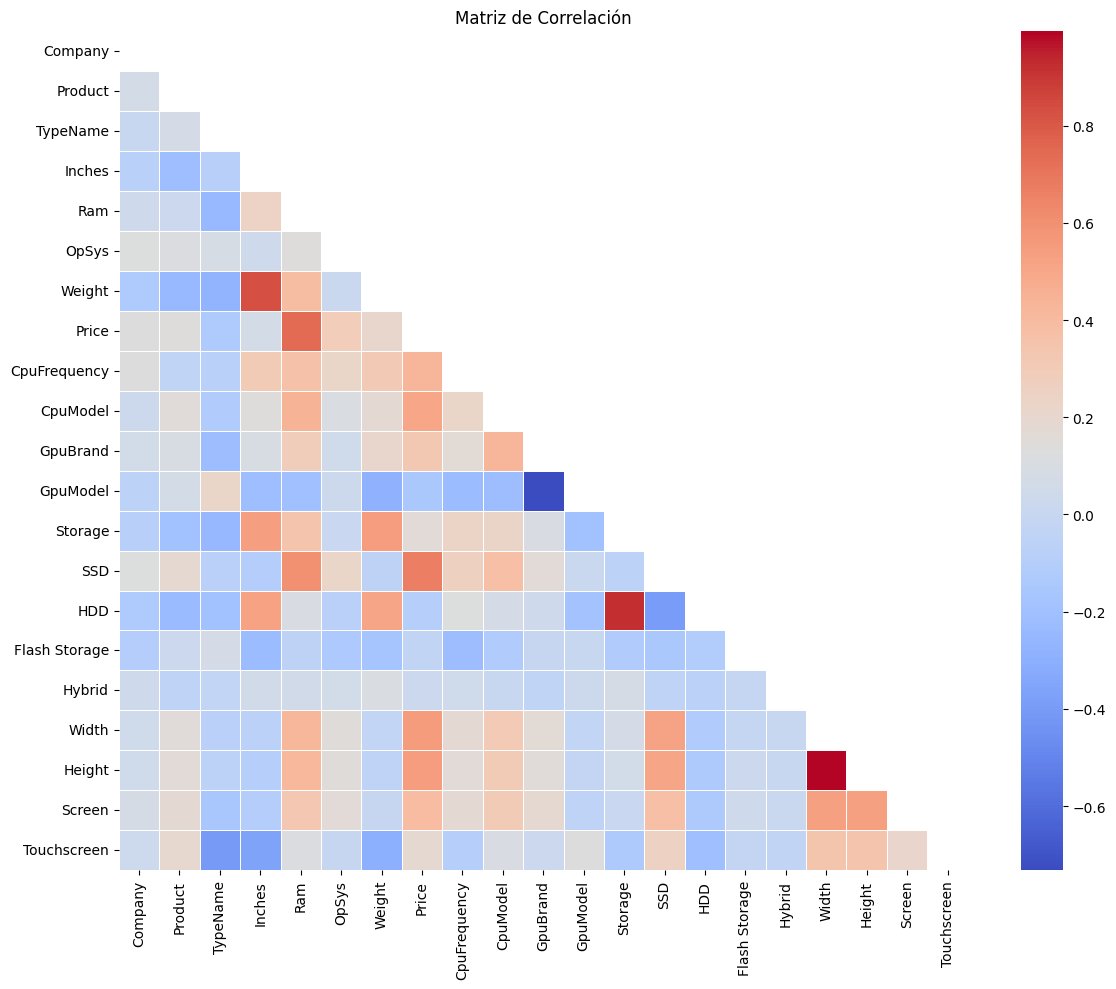

In [30]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_n.corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=False, mask=mask, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlaci√≥n')
plt.tight_layout()
plt.show()

## Implementaci√≥n de modelo

In [ ]:
# Separar caracter√≠sticas (X) y variable objetivo (y)
X = df_n.drop('Price', axis=1).values     # Todas las columnas excepto 'Price'
y = df_n['Price'].values.reshape(-1, 1)   # Solo la columna 'Price'

Para incluir el t√©rmino indpendiente $\beta_0$ en las operaciones matriciales, agregamos una columna de 1's al inicio de x. 

In [ ]:
# np.hstack() concatena horizontalmente la columna de 1's con el resto de las caracter√≠sticas

# Para X (conjunto completo)
X = np.hstack((np.ones((X.shape[0], 1)), X))  

# Para X_test (conjunto de prueba)
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))  

### Divisi√≥n del conjunto de datos en un conjunto de entrenamiento y uno de prueba

Utilizamos una divisi√≥n de entrenamiento y prueba, diviendo el conjunto de datos en dos grupos. El conjunto de entrenamiento, utilizado para entrenar el modelo y el conjunto de prueba utilizado para evaluar su rendimiento. La divisi√≥n habitual para una cantidad de datos relativamente peque√±a es de 70% - 30%.
Esto permite que el modelo aprenda patrones a partir de los datos de entrenamiento, dado que si el modelo se entrenara con todo el conjunto de datos, podr√≠a memorizarlos en lugar de aprender patrones generalizables a partir de una estimaci√≥n imparcial. 


In [ ]:
# Fija la "semilla" del generador de n√∫meros aleatorios de NumPy para garantizar reproducibilidad
np.random.seed(42)
y = y.reshape(-1, 1)

# Mezcla y divisi√≥n 70% de entrenamiento y 30% de prueba
perm = np.random.permutation(len(X))
n_train = int(len(X) * 0.7)

X_train, y_train = X[perm[:n_train]], y[perm[:n_train]]
X_test,  y_test  = X[perm[n_train:]], y[perm[n_train:]]

y_test = y_test.reshape(-1, 1)

In [ ]:
# Verificaci√≥n de dimensiones del dataset completo
print(f"Dimensiones de X: {X.shape}")  # (1275, 14) ‚Üí 1275 muestras, 13 features + 1 columna de bias
print(f"Dimensiones de y: {y.shape}")  # (1275, 1) ‚Üí 1275 precios

# Verificaci√≥n de dimensiones del conjunto de prueba
print("X_test shape:", X_test.shape)  # Deber√≠a ser (n_samples_test, n_features + 1)
print("y_test shape:", y_test.shape)  # Deber√≠a ser (n_samples_test, 1)

### Evaluaci√≥n del rendimiento del modelo

Para evaluar el rendimiento de nuestro modelo con datos reales, calcularemos el error cuadr√°tico medio (EMM) utilizando nuestros datos de prueba, que esperamos sean un buen indicador de los datos reales. Cuanto menor sea el valor, mejor ser√° el rendimiento del modelo. 

\begin{equation}
\min _{\theta} \frac{1}{N}\sum_{i=1}^{N}\left(y_{i}-\hat{y}_i\right)^{2}
\end{equation}

In [ ]:
def compute_cost(X, y, theta):
    m      = len(y)
    errors = predict(X, theta) - y
    return (1/(2*m)) * np.sum(errors**2)

### Implementaci√≥n descenso de gradiente

La regla de actualizaci√≥n para cada paso t es:

\begin{align*}
\theta^{(t+1)} = \theta^{(t)} - \alpha \frac{1}{m} X^\top \left( X \theta^{(t)} - y \right)
\end{align*}

In [ ]:
def gradient_descent(X, y, alpha=0.1, iterations=5000):
    m, n         = X.shape              # tupla (muestras, caracter√≠sticas)
    theta        = np.zeros((n,1))      # inicializa vector de coeficientes theta con ceros, tama√±o (n,1)
    print("Dimensiones de theta:", theta.shape) # Verificacion de sus dimensiones
    cost_history = []
    for _ in range(iterations):
        errors = predict(X, theta) - y
        grad   = (1/m) * X.T.dot(errors)   # calcula el gradiente del costo
        theta  = theta - alpha * grad              # actualiza los coeficientes
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

### Coeficiente de determinaci√≥n $R^2$


Eval√∫a la calidad del ajuste del modelo compar√°ndolo con un modelo b√°sico que siempre predice la media de y

In [ ]:
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res/(ss_tot + 1e-10) # 1e-10 evita divisi√≥n por cero

### Entrenamiento y visualizaci√≥n de la evoluci√≥n del error

In [ ]:
alpha = 0.1           # tasa de aprendizaje
epochs = 5000        # n√∫mero de iteraciones

# Entrenando modelo
theta_final, cost_history = gradient_descent(X_train, y_train, alpha, epochs)

#### Justificaci√≥n de tasa de aprendizaje y n√∫mero de iteraciones utilizadas

In [ ]:
# Probar diferentes alphas para comparar resultados
alphas = [0.001, 0.01, 0.1]
plt.figure(figsize=(10, 6))

for alpha in alphas:
    _, cost = gradient_descent(X_train, y_train, alpha=alpha, iterations=1000)
    plt.plot(cost, label=f"alpha={alpha}")

plt.xlabel("√âpocas")
plt.ylabel("Costo")
plt.title("Comparaci√≥n de tasa de aprendizaje")
plt.legend()
plt.grid(True)
plt.show()

Alpha = 0.01 controla el tama√±o de los pasos que da el algoritmo para actualizar los par√°metros en cada iteraci√≥n. Se elige 0.01 por ser un valor conservador y com√∫nmente usado para evitar que el algoritmo "sobrepase" el m√≠nimo de la funci√≥n de costo (divergencia)
Si alpha es demasiado grande (ej. 01) el costo puede oscilar o incluso divergir.
Si alpha es demasiado peque√±o (ej. 0.00001), el entrenamiento ser√° muy lento y puede no converger en las √©pocas asignadas. 

In [ ]:
# Graficar el historial del costo
plt.figure(figsize=(8, 4))
plt.plot(range(epochs), cost_history)
plt.plot(range(epochs), cost_history)
plt.xlabel("√âpocas")
plt.ylabel("Costo (MSE)")
plt.title("Convergencia del Descenso de Gradiente")
plt.show()

### Evaluaci√≥n del modelo en conjunto de prueba

#### El Error Cuadr√°tico Medio (RMS)

$$
E_{\mathrm{RMS}} = \sqrt{2 E(\mathbf{w^{*}}) / N}
$$

La divisi√≥n por N permite comparar conjuntos de datos de diferentes tama√±os en igualdad de condiciones, y la ra√≠z cuadrada garantiza que ERMS se mida en la misma escala (y en las mismas unidades) que la variable objetivo. 

In [ ]:
#Verificar dimensiones de y_pred
print("y_pred shape:", y_pred.shape)  # Deber√≠a coincidir con y_test.shape

In [ ]:
y_pred = predict(X_test, theta_final)
mse_test  = compute_cost(X_test, y_test, theta_final) * 2  # pasamos de 1/2m a 1/m
rmse_test = np.sqrt(mse_test)
r2        = r_squared(y_test, y_pred)

print(f"MSE test:  {mse_test:.4f}")    # En cuanto mas bajo mejor
print(f"RMSE test: {rmse_test:.4f}")   
print(f"R¬≤ test:   {r2:.4f}")          # deber√≠a ser cercano a 1 

### Visualizaci√≥n de resultados

In [ ]:
import numpy as np

# Verificaci√≥n final
assert len(y_test) == len(y_pred), f"Tama√±os diferentes: {len(y_test)} vs {len(y_pred)}"

# Gr√°fico con verificaci√≥n de errores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, c='blue', edgecolors='w', s=80)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Precio real", fon
           tsize =12)
plt.ylabel("Precio predicho",fontsize=12)
plt.title("Validaci√≥n: Real vs Predicho",fontsize=14)
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

### Interpretaci√≥n de coeficientes

Los coeficientes theta de la regresi√≥n lineal, indican cu√°nto cambia el valor de la variable objetivo (Price) al aumentar en una unidad la caracter√≠stica correspondiente, manteniendo las dem√°s constantes.
- El coeficiente positivo implica una relaci√≥n directa: al aumentar la caracter√≠stica, tambi√©n aumenta el precio.
- El coeficiente negativo indica una relaci√≥n inversa: al aumentar la caracter√≠stica, disminuye el precio.

In [ ]:
# Obtener nombres de caracter√≠sticas (excluyendo el bias)
feature_names = ['Intercepto'] + df_n.drop('Price', axis=1).columns.tolist()

# Mostrar coeficientes
for name, coef in zip(feature_names, theta_final.flatten()):
    print(f"{name}: {coef:.6f}")

### Comparaci√≥n de resultados con LinearRegression de sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Entrenamiento usando LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred_sklearn = model.predict(X_test)

# Evaluaci√≥n
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print("Regresion linear con sklearn")
print(f"MSE: {mse_sklearn:.4f}")
print(f"RMSE: {rmse_sklearn:.4f}")
print(f"R^2: {r2_sklearn:.4f}")

### Validaci√≥n cruzada con KFold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []

for train_idx, val_idx in kf.split(X):
    # Asegurar que y sea vector columna
    X_train, X_val = X[train_idx], X[val_idx]  
    y_train, y_val = y[train_idx].reshape(-1, 1), y[val_idx].reshape(-1, 1)  

    # Entrenamiento 
    theta, _ = gradient_descent(X_train, y_train, alpha=0.01, iterations=1000)
    
    # Predicci√≥n
    y_pred = X_val @ theta  

    # C√°lculo de RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)

print("RMSE promedio:", np.mean(rmse_scores))
print("Desviaci√≥n est√°ndar de y: ", np.std(y))

KFold verifica las dimensiones en cada pliege, y los resultados en todos ellos indican que el modelo posee 20 caracter√≠sticas m√°s el t√©rmino de bias (intercepto).
El valor RMSE de 0.0802 es un valor bajao, lo que sugiere que el modelo tiene un buen desempe√±o, ya que y representa precios en miles, un error de ¬±0.08 miles es aceptable.
El RMSE es significativamente menor a la desviaci√≥n est√°ndar, lo que indica que el modelo es √∫til.

# Regresi√≥n log√≠stica multiclase

La regresi√≥n log√≠stica es normalmente un modelo de clasificaci√≥n binaria, es decir, distingue entre dos clases (por ejemplo: "spam" vs "no spam").
Pero si se tienen m√°s de dos clases (por ejemplo, clasificar entre 3 marcas de veh√≠culos), se necesita adaptar el modelo. Aqu√≠ es donde entra el enfoque One-vs-Rest:

*¬øC√≥mo funciona One-vs-Rest?*
Suponiendo que se tienen tres clases: A, B y C.
Con One-vs-Rest vas a entrenar un clasificador binario por cada clase:
* Clasificador 1: ¬øEs A o no? (A vs B+C)
* Clasificador 2: ¬øEs B o no? (B vs A+C)
* Clasificador 3: ¬øEs C o no? (C vs A+B)
Cada uno de estos clasificadores se entrena por separado usando regresi√≥n log√≠stica binaria. Luego, cuando se hace una predicci√≥n, cada uno da una probabilidad, y se elige la clase con la mayor probabilidad.

Inicialmente importaremos todas las librerias necesarias para la ejecuci√≥n de nuestros procesos:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Para poder utilizar sklearn debes instalar scikit-learn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings

# Configurar estilo de visualizaci√≥n
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

Ahora cargaremos los datasets que se utilizar√°n, estos estan en el siguiente orden de carpetas y mostramos los primeros registros del dataset

```bash
|--datasources
   |--parkinsons
```

In [ ]:
df = pd.read_csv("./datasources/parkinsons/parkinsons.data")
df = df.drop_duplicates()
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

Una vez revisados algunos datos y cargadas las dependencias necesarios, vamos a explorar la informaci√≥n del dataset

In [ ]:
print("Informaci√≥n del dataset:")
print(f"N√∫mero de filas: {df.shape[0]}")
print(f"N√∫mero de columnas: {df.shape[1]}")
print("\nDistribuci√≥n de la variable objetivo:")
print(df['status'].value_counts())
print("\nPorcentaje de cada clase:")
print(df['status'].value_counts(normalize=True) * 100)

# Mostramos los tipos de datos por columnas
print("\nTipos de datos en cada columna:")
print(df.dtypes)

# Verificamos si existen valores faltantes
print("\nValores faltantes en cada columna:")
print(df.isnull().sum())


Informaci√≥n del dataset:
N√∫mero de filas: 195
N√∫mero de columnas: 24

Distribuci√≥n de la variable objetivo:
status
1    147
0     48
Name: count, dtype: int64

Porcentaje de cada clase:
status
1    75.384615
0    24.615385
Name: proportion, dtype: float64

Tipos de datos en cada columna:
name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

Valores faltantes en

Ahora vamos a explorar cada una de las caracter√≠sticas que podemos encontrar en el dataset en busca de patrones y relaciones en la informaci√≥n, en este caso definiremos una variable que excluya los elementos que no son de tipo num√©rico para poder generar la matriz de correlaci√≥n, tomando la variable "status" como objetivo porque es la que indica la presencia  o ausencia de Parkinson y permite encontrar qu√© caracter√≠sticas tienen mayor relaci√≥n con la enfermedad

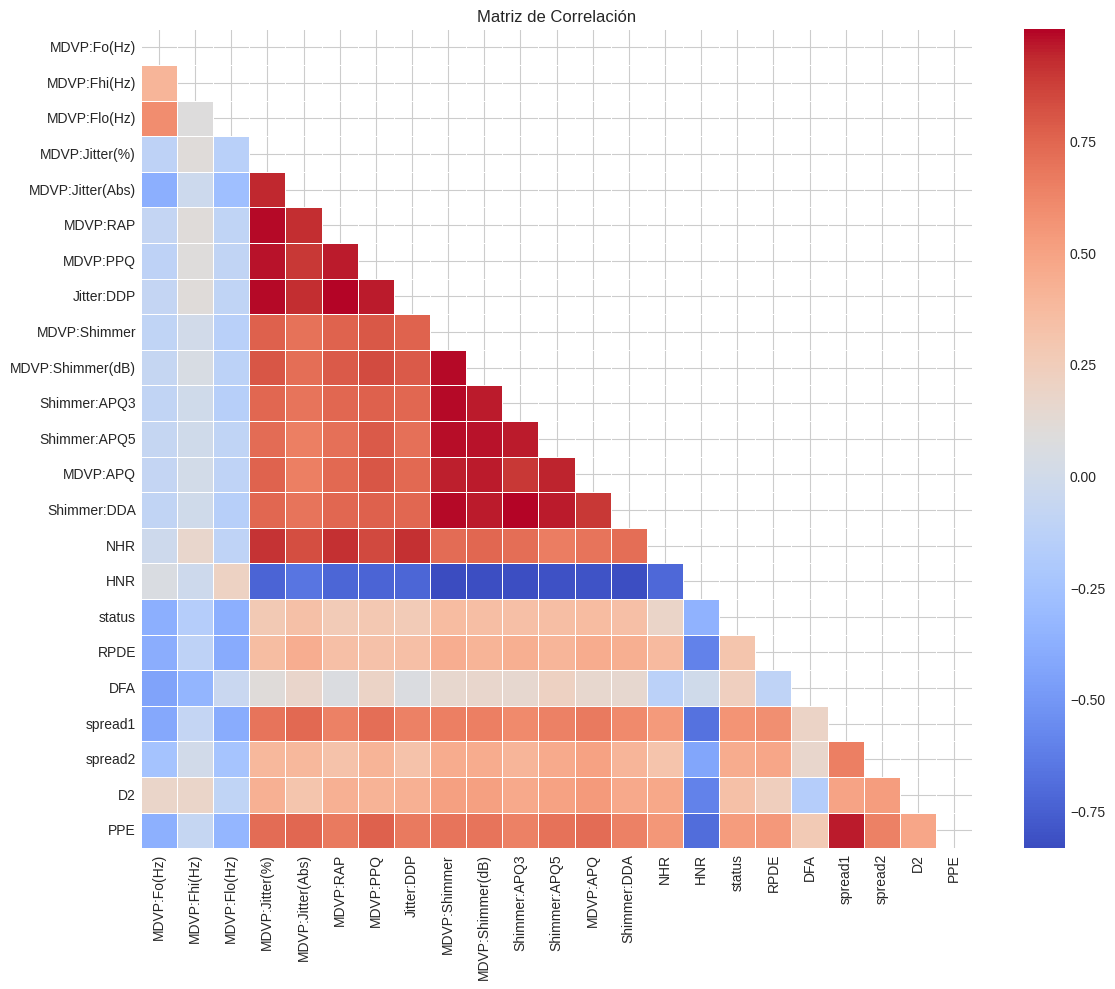

In [ ]:

# Definimos las estad√≠sticas descriptivas de las columnas num√©ricas
df.describe().T.sort_values(by='mean', ascending=False)

# Definimos las dimensiones para los gr√°ficos
plt.figure(figsize=(12, 10))

# Generamos un nuevo dataframe que solo involucra valores num√©ricos
numeric_df = df.select_dtypes(include=['number'])

# Generamos la matriz de correlaci√≥n con la variable que tenemos como objetivo: status
correlation_matrix = numeric_df.corr()

mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=False, mask=mask, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlaci√≥n')
plt.tight_layout()
plt.show()

De esta gr√°fica de la matriz de correlaci√≥n, podemos destacar lo siguiente:
Tenemos grupos de variables altamente correlacionada, las que est√°n en rojo, entre diversas medidas de Jitter y Shimmer (MDVP, MDVP, Jitter, etc.), lo cual indica que muchas de estas caracter√≠sticas que miden variaciones en la voz est√°n fuertemente relacionadas entre s√≠.

Tenemos grupos de correlaciones negativas, por ejemplo, e observa que HNR (Harmonic to Noise Ratio) tiene correlaciones negativas (en azul) con varias medidas de Jitter y Shimmer, y esto tiene sentido puesto a que HNR mide la calidad de la voz, mientras que Jitter y Shimmer miden irregularidades

Tambi√©n tenemos grupos de variables potencialmente importantes, por ejemplo, las medidas como PPE, spread1, y spread2 parecen tener patrones de correlaci√≥n interesantes con otras variables, mientras que DFA muestra un patr√≥n de correlaci√≥n m√°s d√©bil y diferenciado.

In [ ]:
# Seleccionamos las primeras  10 caracter√≠sticas con mayor correlaci√≥n con 'status'
correlations = numeric_df.corr()['status'].sort_values(ascending=False)
print("Top 10 caracter√≠sticas con mayor correlaci√≥n con 'status':")
print(correlations.head(11))  # 11 porque 'status' tambi√©n est√° en la lista

Top 10 caracter√≠sticas con mayor correlaci√≥n con 'status':
status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
Name: status, dtype: float64


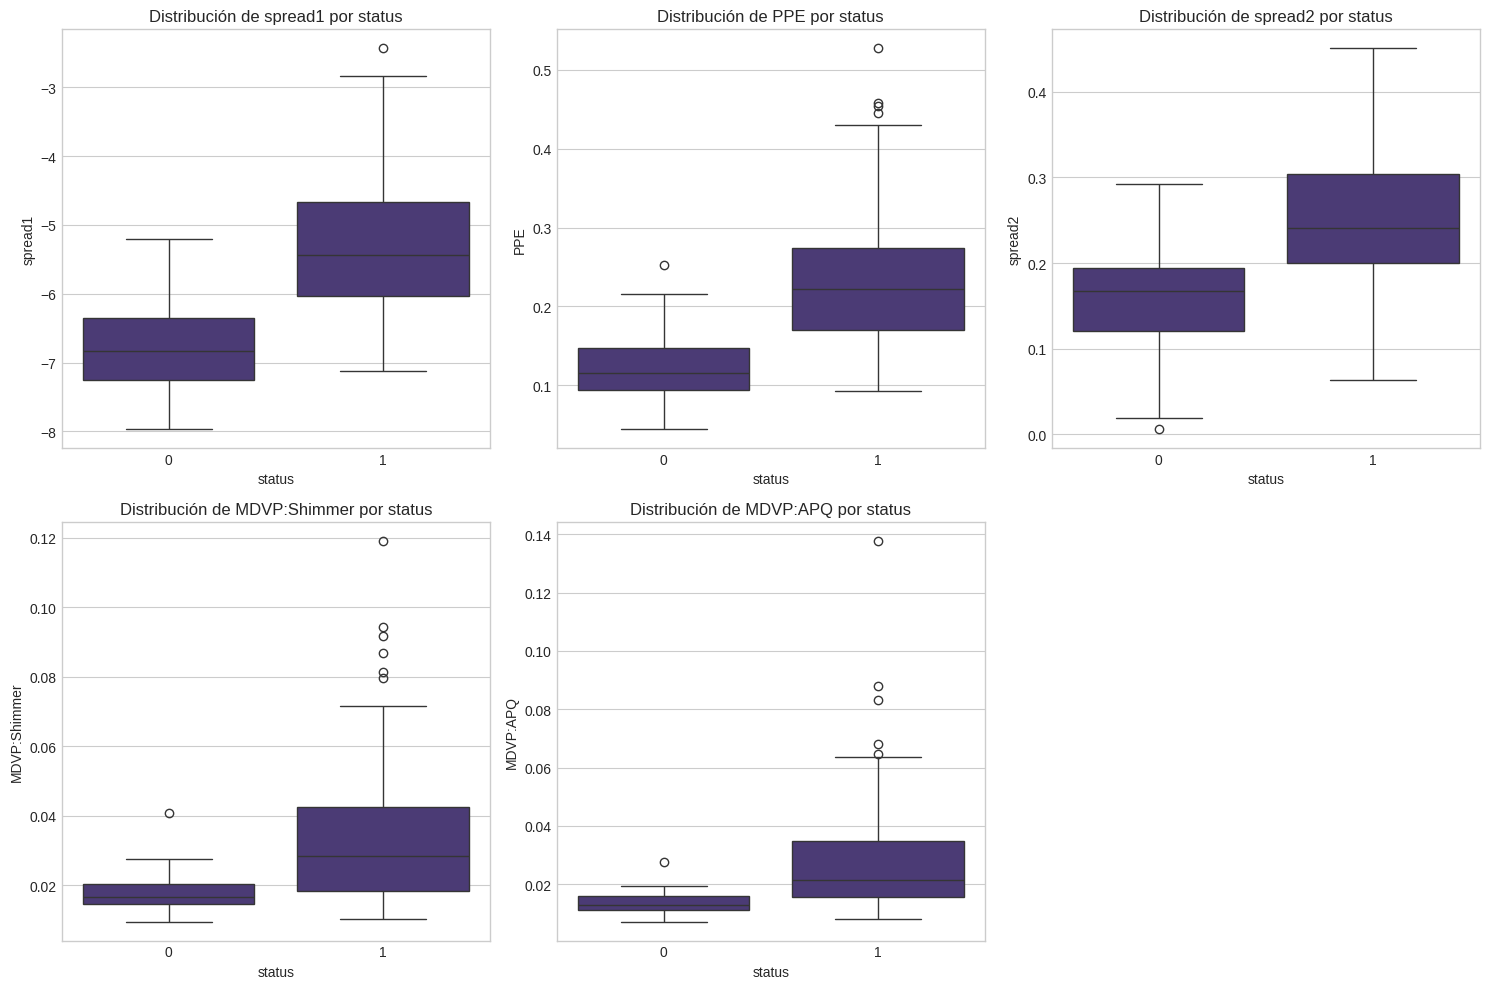

In [ ]:
# Obtenemos la distribuci√≥n de algunas otras caracter√≠sticas importantes seg√∫n su correlaci√≥n con 'status'
top_features = correlations.index[1:6]  # Aqu√≠ excluimos 'status'

plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='status', y=feature, data=df)
    plt.title(f'Distribuci√≥n de {feature} por status')
plt.tight_layout()
plt.show()

Del gr√°fico de relaciones podemos decir lo siguiente:
#### Distribuci√≥n de spread1 por status
- Los valores de spread1 son notablemente m√°s bajos en personas sanas (0) que en pacientes con Parkinson (1)
- Personas sanas: Valores principalmente entre -8 y -5
- Personas con Parkinson: Valores entre -7 y -3, con una mediana significativamente m√°s alta

#### Distribuci√≥n de PPE por status
- PPE (otra medida no lineal de variaci√≥n de frecuencia fundamental)
- Los valores consistentemente m√°s bajos en personas sanas (principalmente entre 0.05 y 0.15)
- Los valores m√°s altos y con mayor dispersi√≥n en personas con Parkinson (aproximadamente entre 0.1 y 0.4)

#### Distribuci√≥n de spread2 por status
- Hay un contraste significativo: Valores m√°s bajos en personas sanas (mayormente entre 0 y 0.2)
- Valores m√°s altos en personas con Parkinson (principalmente entre 0.1 y 0.4)

#### Distribuci√≥n de MDVP por status: Shimmer (que es una medida de variabilidad en la amplitud vocal)
- Los valores significativamente m√°s bajos en personas sanas (alrededor de 0.02)
- Los Valores m√°s altos en pacientes con Parkinson (entre 0.02 y 0.04)
- Varios valores at√≠picos en el grupo con Parkinson, que indica mayor variabilidad

#### Distribuci√≥n de MDVP por status: APQ (que es otra medida de perturbaci√≥n de amplitud)
- Patr√≥n similar al Shimmer: valores m√°s bajos en personas sanas
- Valores m√°s altos y mayor dispersi√≥n en personas con Parkinson
- Varios valores at√≠picos en el grupo con Parkinson

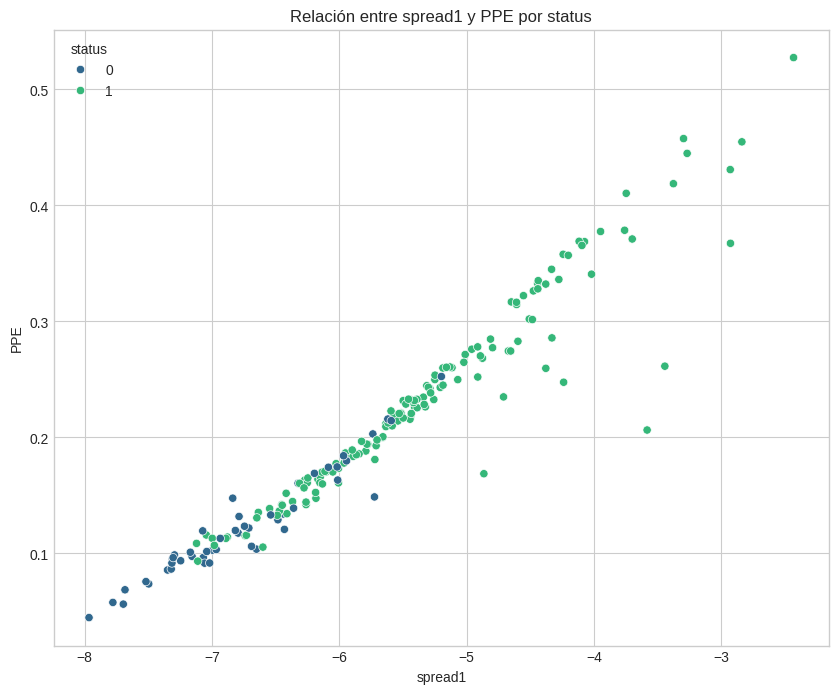

In [ ]:
# Obtenemos la relaci√≥n entre las dos caracter√≠sticas m√°s correlacionadas con 'status'
plt.figure(figsize=(10, 8))
sns.scatterplot(x=top_features[0], y=top_features[1], hue='status', data=df, palette='viridis')
plt.title(f'Relaci√≥n entre {top_features[0]} y {top_features[1]} por status')
plt.show()

Del gr√°fico anterior podemos visualizar la relaci√≥n entre las caracter√≠sticas spread1 y PPE, diferenciando entre individuos sanos (los cuales tienen status=0 y se identifican con puntos azules) y personas con enfermedad de Parkinson (las cuales tienen status=1 y se identifican con puntos verdes).

#### Separaci√≥n entre grupos
- Los individuos sanos se concentran en la esquina inferior izquierda
- Las personas con Parkinson se distribuyen hacia la derecha y arriba


#### Correlaci√≥n positiva fuerte:
- Existe una relaci√≥n aproximadamente lineal positiva entre spread1 y PPE
- A medida que spread1 aumenta (se vuelve menos negativo), PPE tambi√©n aumenta


#### Rangos de valores:
- Personas sanas
  - spread1: aproximadamente entre -8 y -6.5
  - PPE: aproximadamente entre 0.05 y 0.15
- Personas con Parkinson (verde):
  - spread1: principalmente entre -6.5 y -3
  - PPE: principalmente entre 0.1 y 0.5

### Preprocesamiento para Regresi√≥n Log√≠stica
Vamos a preparar los datos para el entrenamiento del modelo:

In [ ]:
# Dividimos las caracter√≠sticas (X) y la variable objetivo (y)
X = df.drop(['status', 'name'], axis=1)  # Excluimos 'name' ya que es un identificador
y = df['status']

# Dividimos los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizamos las caracter√≠sticas para mejorar la convergencia del descenso de gradiente
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Dimensiones de X_train_scaled: {X_train_scaled.shape}")
print(f"Dimensiones de X_test_scaled: {X_test_scaled.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

Dimensiones de X_train_scaled: (136, 22)
Dimensiones de X_test_scaled: (59, 22)
Dimensiones de y_train: (136,)
Dimensiones de y_test: (59,)


## Implementaci√≥n de Regresi√≥n Log√≠stica con Descenso de Gradiente
Una vez hemos preprocesado los datos para el an√°lisis, implementaremos la regresi√≥n log√≠stica utilizando el Gradient Descent para optimizar los par√°metros del modelo, para esto, los pasos a seguir son:
* Obtener valores a probabilidades con la funci√≥n sigmoid, limitando valores para evitar el desboramiento num√©rico
* Obtener la p√©rdida log√≠stica
  * Fijar un epsilon peque√±o para evitar que se llegue a log(0)
  * Calcular la p√©rdida log√≠stica
* Entrenar el modelo usando Descenso de Gradiente
  * Se recorre el dataset
  * Se obtiene el paso forward
  * Se calculan los gradientes
  * Se calcula y almacena la p√©rdida
  * Se Verifica la convergencia temprana


In [ ]:
class LogisticRegressionGD:
    """
    Implementamos Regresi√≥n Log√≠stica con Descenso de Gradiente
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000, tol=1e-4):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.tol = tol
        self.weights = None
        self.bias = None
        self.losses = []
        
    def sigmoid(self, z):
        """Funci√≥n sigmoid para transformar valores a probabilidades"""
        # Evitamos el desbordamiento num√©rico
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def compute_loss(self, X, y):
        """Funci√≥n de p√©rdida log√≠stica (cross-entropy)"""
        m = X.shape[0]
        z = np.dot(X, self.weights) + self.bias
        h = self.sigmoid(z)
        
        # Evitar log(0) agregando un epsilon peque√±o
        epsilon = 1e-15
        h = np.clip(h, epsilon, 1 - epsilon)
        
        # C√°lculo de la p√©rdida log√≠stica (cross-entropy)
        loss = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return loss
    
    def fit(self, X, y):
        """Entrenamos el modelo usando descenso de gradiente"""
        # Inicializamos par√°metros
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        self.losses = []
        
        # Ejecuci√≥n del Descenso de gradiente
        for i in range(self.n_iterations):
            # Obtenemos Paso forward
            z = np.dot(X, self.weights) + self.bias
            h = self.sigmoid(z)
            
            # Calculamos gradientes
            dw = (1/m) * np.dot(X.T, (h - y))
            db = (1/m) * np.sum(h - y)
            
            # Actualizaci√≥n de par√°metros
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Calculamos y almacenamos la p√©rdida
            loss = self.compute_loss(X, y)
            self.losses.append(loss)
            
            # Verificamos convergencia temprana
            if i > 0 and abs(self.losses[i] - self.losses[i-1]) < self.tol:
                print(f"Convergencia alcanzada en la iteraci√≥n {i}")
                break
            
            # Imprimimos el progreso cada 100 iteraciones
            if i % 100 == 0:
                print(f"Iteraci√≥n {i}, P√©rdida: {loss:.6f}")
                
        return self
    
    def predict_proba(self, X):
        """Predecimos probabilidades de clase"""
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)
    
    def predict(self, X, threshold=0.5):
        """Predecimos clase (0 o 1)"""
        return (self.predict_proba(X) >= threshold).astype(int)

Ahora que tenemos una clase con m√©todos que necesarios para la implementaci√≥n de la regresi√≥n log√≠stica, procederemos a implementar la estrategia One-vs-Rest para mostrar el funcionamiento en casos multiclase, en la cual los pasos a seguir son:
* Entrenar un clasificador binario para cada clase
* Crear etiquetas binarias por cada elemento, con los valores 1 para la clase actual y 0 para el resto
* Crear y entrenar el clasificador para cada clase que se est√© iterando
* Almacenar el clasificador entrenado
* Crear una matriz de probabilidades y calcular la probabilidad de casa clase
* Se calcula la clase con mayor probabilidad


In [ ]:
class OneVsRestLogisticRegression:
    """
    Implementamos la estrategia One-vs-Rest para clasificaci√≥n multiclase
    usando regresi√≥n log√≠stica con descenso de gradiente
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000, tol=1e-4):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.tol = tol
        self.classifiers = {}
        self.classes = None
        
    def fit(self, X, y):
        """Entrenamos un clasificador binario para cada clase"""
        self.classes = np.unique(y)
        
        for c in self.classes:
            print(f"\nEntrenando clasificador para clase {c}")
            
            # Crear etiquetas binarias (1 para la clase actual, 0 para el resto)
            y_binary = (y == c).astype(int)
            
            # Crear y entrenar un clasificador para esta clase
            clf = LogisticRegressionGD(
                learning_rate=self.learning_rate,
                n_iterations=self.n_iterations,
                tol=self.tol
            )
            clf.fit(X, y_binary)
            
            # Almacenar el clasificador
            self.classifiers[c] = clf
        
        return self
    
    def predict_proba(self, X):
        """Predecimos probabilidades para cada clase"""
        # Creamos una matriz de probabilidades (muestras x clases)
        proba = np.zeros((X.shape[0], len(self.classes)))
        
        # Predecimos la probabilidad para cada clase
        for i, c in enumerate(self.classes):
            proba[:, i] = self.classifiers[c].predict_proba(X)
            
        return proba
    
    def predict(self, X):
        """Predecimos la clase con mayor probabilidad"""
        proba = self.predict_proba(X)
        return self.classes[np.argmax(proba, axis=1)]

Ahora que hemos desarrollado la l√≥gica necesaria para la implementaci√≥n de la regresi√≥n log√≠stica con optimizaci√≥n por Gradient Descent, procedemos a entrenar el modelo y evaluar su rendimiento, siguiendo los siguientes pasos:
* Entrenar el model con los datos necesarios
* Realizar predicciones en el conjunto de datos de prueba
* Evaluar el rendimiento del modelo para corroborar el correcto funcionamiento del mismo

In [ ]:
# Entrenamos el modelo con los datos de entrenamiento
model = OneVsRestLogisticRegression(learning_rate=0.1, n_iterations=1000)
model.fit(X_train_scaled, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nExactitud (Accuracy): {accuracy:.4f}")
print("\nMatriz de Confusi√≥n:")
print(conf_matrix)
print("\nInforme de Clasificaci√≥n:")
print(class_report)


Entrenando clasificador para clase 0
Iteraci√≥n 0, P√©rdida: 0.644723
Iteraci√≥n 100, P√©rdida: 0.331333
Iteraci√≥n 200, P√©rdida: 0.301078
Convergencia alcanzada en la iteraci√≥n 265

Entrenando clasificador para clase 1
Iteraci√≥n 0, P√©rdida: 0.644723
Iteraci√≥n 100, P√©rdida: 0.331333
Iteraci√≥n 200, P√©rdida: 0.301078
Convergencia alcanzada en la iteraci√≥n 265

Exactitud (Accuracy): 0.8814

Matriz de Confusi√≥n:
[[ 9  6]
 [ 1 43]]

Informe de Clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.88      0.98      0.92        44

    accuracy                           0.88        59
   macro avg       0.89      0.79      0.82        59
weighted avg       0.88      0.88      0.87        59



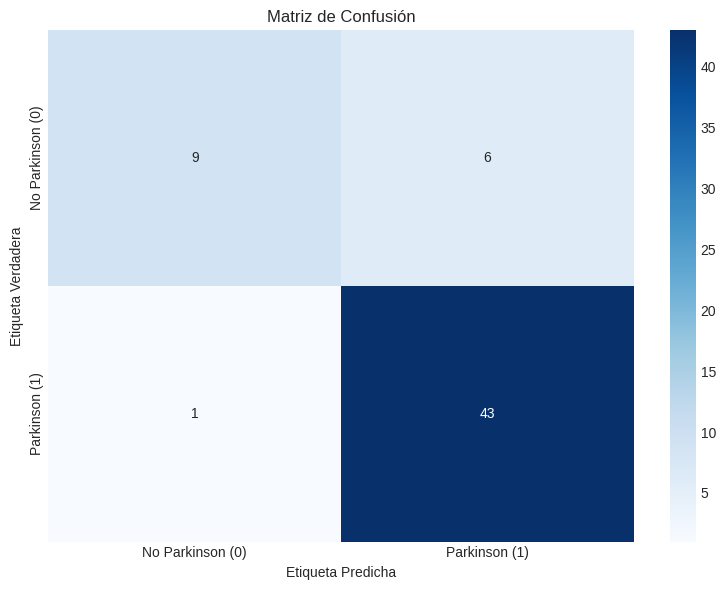

In [ ]:
# Mostramos la matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Parkinson (0)', 'Parkinson (1)'],
            yticklabels=['No Parkinson (0)', 'Parkinson (1)'])
plt.title('Matriz de Confusi√≥n')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.tight_layout()
plt.show()

Una vez hemos ejecutado el proceso, y obtenido la gr√°fica anterior, podemos observar los resultados:

- Verdaderos Negativos (arriba-izquierda): 9 casos
  - Personas correctamente clasificadas como no teniendo Parkinson
- Falsos Positivos (arriba-derecha): 6 casos
  -Personas sanas incorrectamente clasificadas como teniendo Parkinson
- Falsos Negativos (abajo-izquierda): 1 caso
  - Persona con Parkinson incorrectamente clasificada como sana
- Verdaderos Positivos (abajo-derecha): 43 casos
  - Personas correctamente clasificadas como teniendo Parkinson

Ahora, con esta informaci√≥n podemos explicar el listado de resultados previo al gr√°fico
- Exactitud (Accuracy): (9 + 43) / (9 + 6 + 1 + 43) = 52/59 ‚âà 88.1%
  - Porcentaje total de predicciones correctas
- Sensibilidad/Recall para Parkinson: 43 / (43 + 1) = 43/44 ‚âà 97.7%
  - Capacidad del modelo para identificar correctamente a las personas con Parkinson
  - En este caso vemos que es muy alta, lo cual es crucial para un sistema de detecci√≥n m√©dica
- Especificidad para Parkinson: 9 / (9 + 6) = 9/15 = 60%
  - Capacidad del modelo para identificar correctamente a las personas sanas
  - En este caso vemos que es moderada, indicando cierta tendencia a sobrediagnosticar casos
- Precisi√≥n para Parkinson: 43 / (43 + 6) = 43/49 ‚âà 87.8%
  - De todos los diagnosticados como Parkinson, qu√© porcentaje realmente tiene la enfermedad
- Valor predictivo negativo: 9 / (9 + 1) = 9/10 = 90%
  - De todos los diagnosticados como sanos, qu√© porcentaje realmente est√° sano

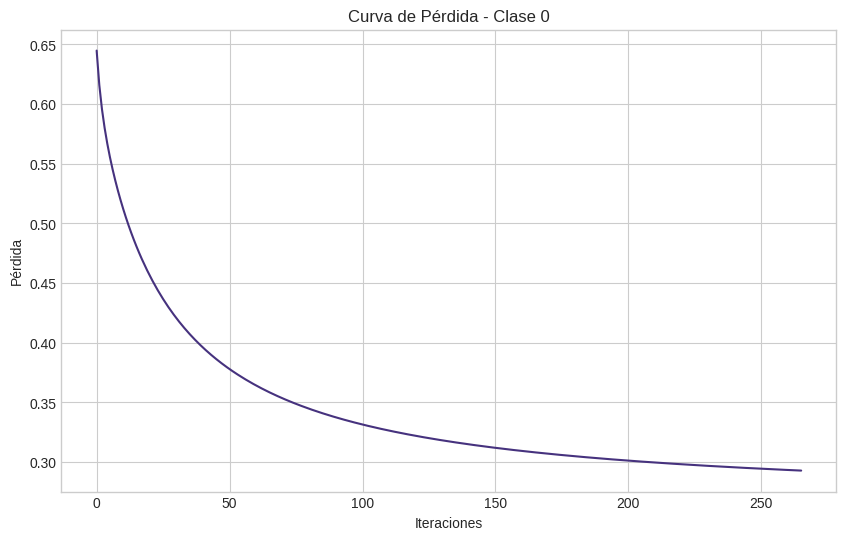

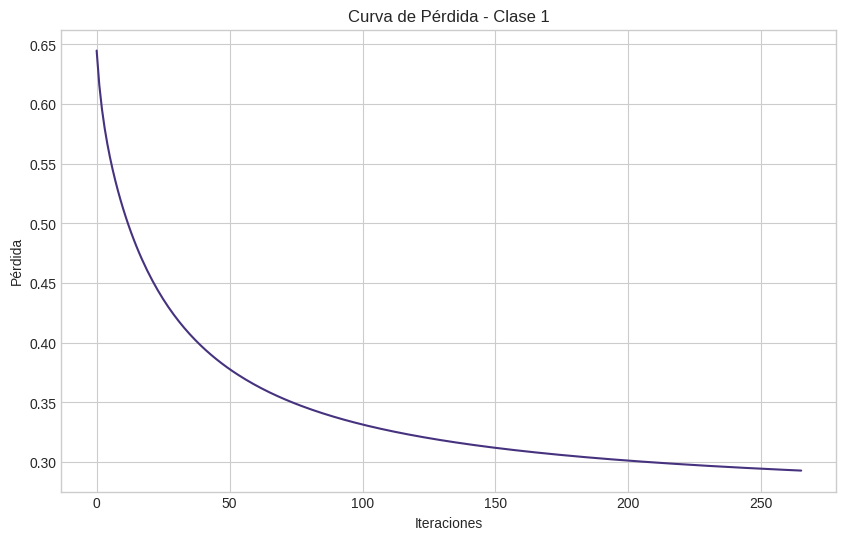

In [ ]:
# Mostramos la curva de p√©rdida durante el entrenamiento
for c in model.classes:
    plt.figure(figsize=(10, 6))
    plt.plot(model.classifiers[c].losses)
    plt.title(f'Curva de P√©rdida - Clase {c}')
    plt.xlabel('Iteraciones')
    plt.ylabel('P√©rdida')
    plt.grid(True)
    plt.show()

Para finalizar, lo que podemos observar en las gr√°ficas de p√©rdidas es lo siguiente:
An√°lisis de las curvas de p√©rdida:
Imagen 1: Curva de P√©rdida - Clase 0 (No Parkinson)
- Muestra tener un valor inicial alto, en el cual la p√©rdida iniccia alrededor de 0.60-0.65, indicando que las predicciones iniciales son deficientes. La gr√°fica adem√°s muestra un decenso r√°pido inicial, en el que se observa que existe una disminuci√≥n pronunciada en las primeras 50 iteraciones, tambi√©n se puede observar que la pendiente se vuelve m√°s suave en cuanto avanza el entrenamiento, tanto que al llegar al final, la p√©rdida converge apr√≥ximadamente a 0.29-0.30 despu√©s de 250 iteraciones.

Imagen 2: Curva de P√©rdida - Clase 1 (Parkinson)
Esta curva muestra la evoluci√≥n de la funci√≥n de p√©rdida para el clasificador de la clase 1 (Parkinson):
- Muestra un valor inicial similar con respecto al gr√°fico de la imagen uno, teniendo una p√©rdida alta entre 0.60-0.65, que tiene un patr√≥n de descenso r√°pido inicial, seguido de una convergencia m√°s gradual que se alcanza luego de 250 iteraciones con un valor de convergencia aproximadamente de 0.29-0.30.

Con lo cual podemos concluir que obtuvimos una convergencia exitosa, ya que ambas curvas muestran una clara tendencia descendente y un comportamiento de convergencia, lo que indica que el algoritmo de descenso de gradiente est√° funcionando correctamente, manteniendo una tasa de prendizaje adecuada que se interpreta por la forma suave de las curvas, mostrando que no es tan alta para generar oscilaciones, ni tan bajas como para volver la convergencia m√°s lenta de lo ideal, alcanzando su convergencia con un n√∫mero adecuado de iteraciones.